# Tutorial Explore

Play around with the dataset in the tutorial. Tutorial here https://scvelo.readthedocs.io/VelocityBasics.html.

In [49]:
import scvelo as scv
import scanpy as sc
from matplotlib import rcParams
scv.logging.print_version()

Running scvelo 0.2.2 (python 3.8.2) on 2020-10-09 06:10.


In [2]:
adata = scv.datasets.pancreas()
adata

endocrinogenesis_day15.h5ad: 52.5MB [00:02, 23.1MB/s]                              


AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

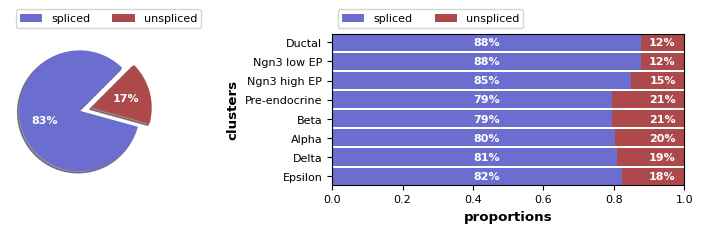

In [3]:
scv.pl.proportions(adata)

In [4]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [5]:
scv.tl.velocity(adata, mode='stochastic')

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [6]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:09) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


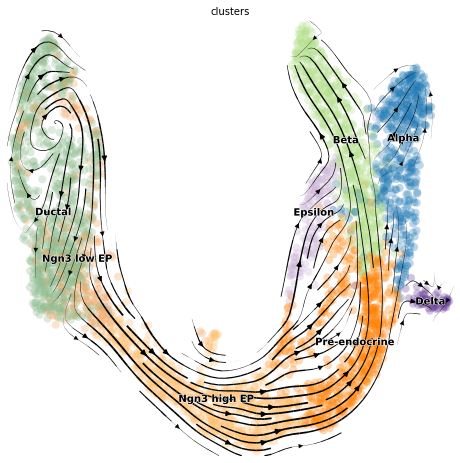

In [10]:
rcParams['figure.figsize'] = 8, 8

scv.pl.velocity_embedding_stream(adata, basis='umap')

In [12]:
scv.tl.rank_velocity_genes(adata, groupby='clusters', min_corr=.3)

df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head()

ranking velocity genes
    finished (0:00:02) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


,Ductal,Ngn3 low EP,Ngn3 high EP,Pre-endocrine,Beta,Alpha,Delta,Epsilon
0,Notch2,Ptpn3,Pde1c,Pam,Pax6,Zcchc16,Zdbf2,Tmcc3
1,Sox5,Hacd1,Ptprs,Sdk1,Unc5c,Nlgn1,Spock3,Heg1
2,Krt19,Hspa8,Pclo,Baiap3,Nnat,Nell1,Akr1c19,Gpr179
3,Hspa8,Gm8113,Rap1gap2,Abcc8,Tmem108,Prune2,Ptprt,Ica1
4,Ano6,Kcnq1,Ttyh2,Gnas,Ptprt,Ksr2,Snap25,Ncoa7


## Marker Genes

In [122]:
sc.tl.rank_genes_groups(adata, 'clusters', method='wilcoxon')

In [123]:
list(adata.uns['rank_genes_groups']['names']['Alpha'])[:10]

['Tmem27',
 'Pcsk1n',
 'Cpe',
 'Ttr',
 'Gpx3',
 'Meis2',
 'Gnas',
 'Tspan7',
 'Pyy',
 'Slc38a5']

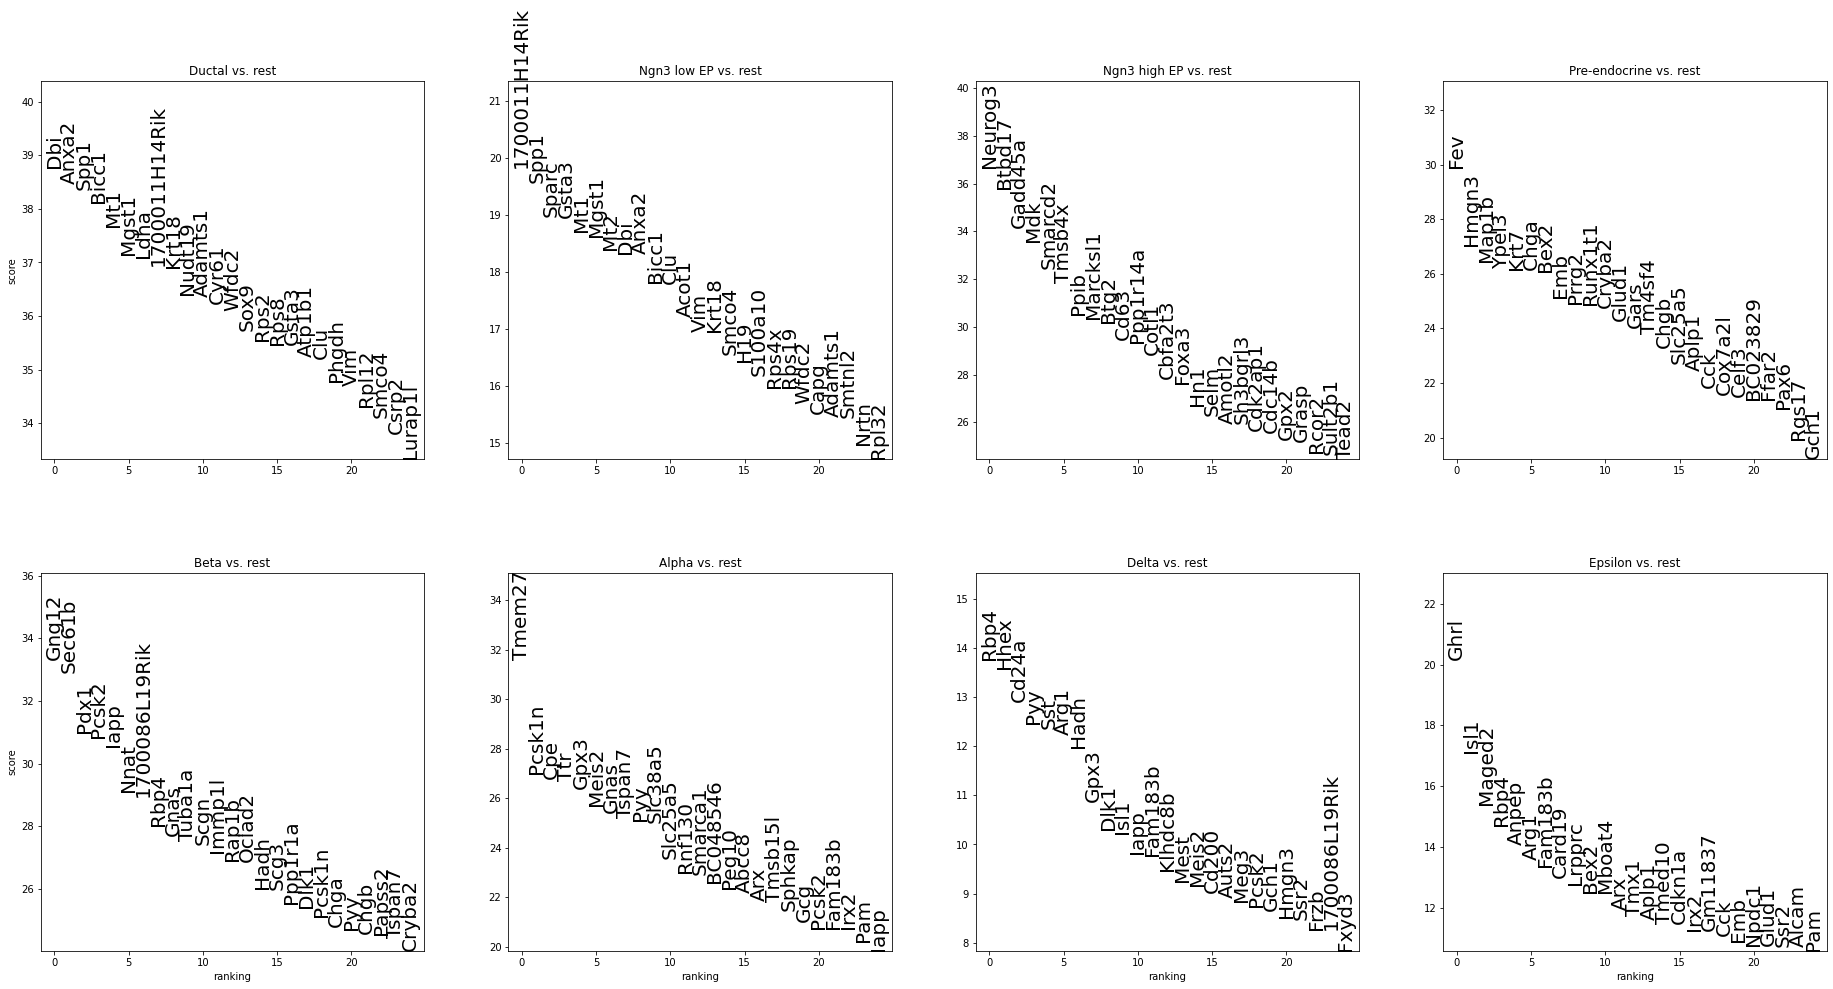

In [106]:
sc.pl.rank_genes_groups(adata, fontsize=20, n_genes=25, sharey=False)

## Subset Genes

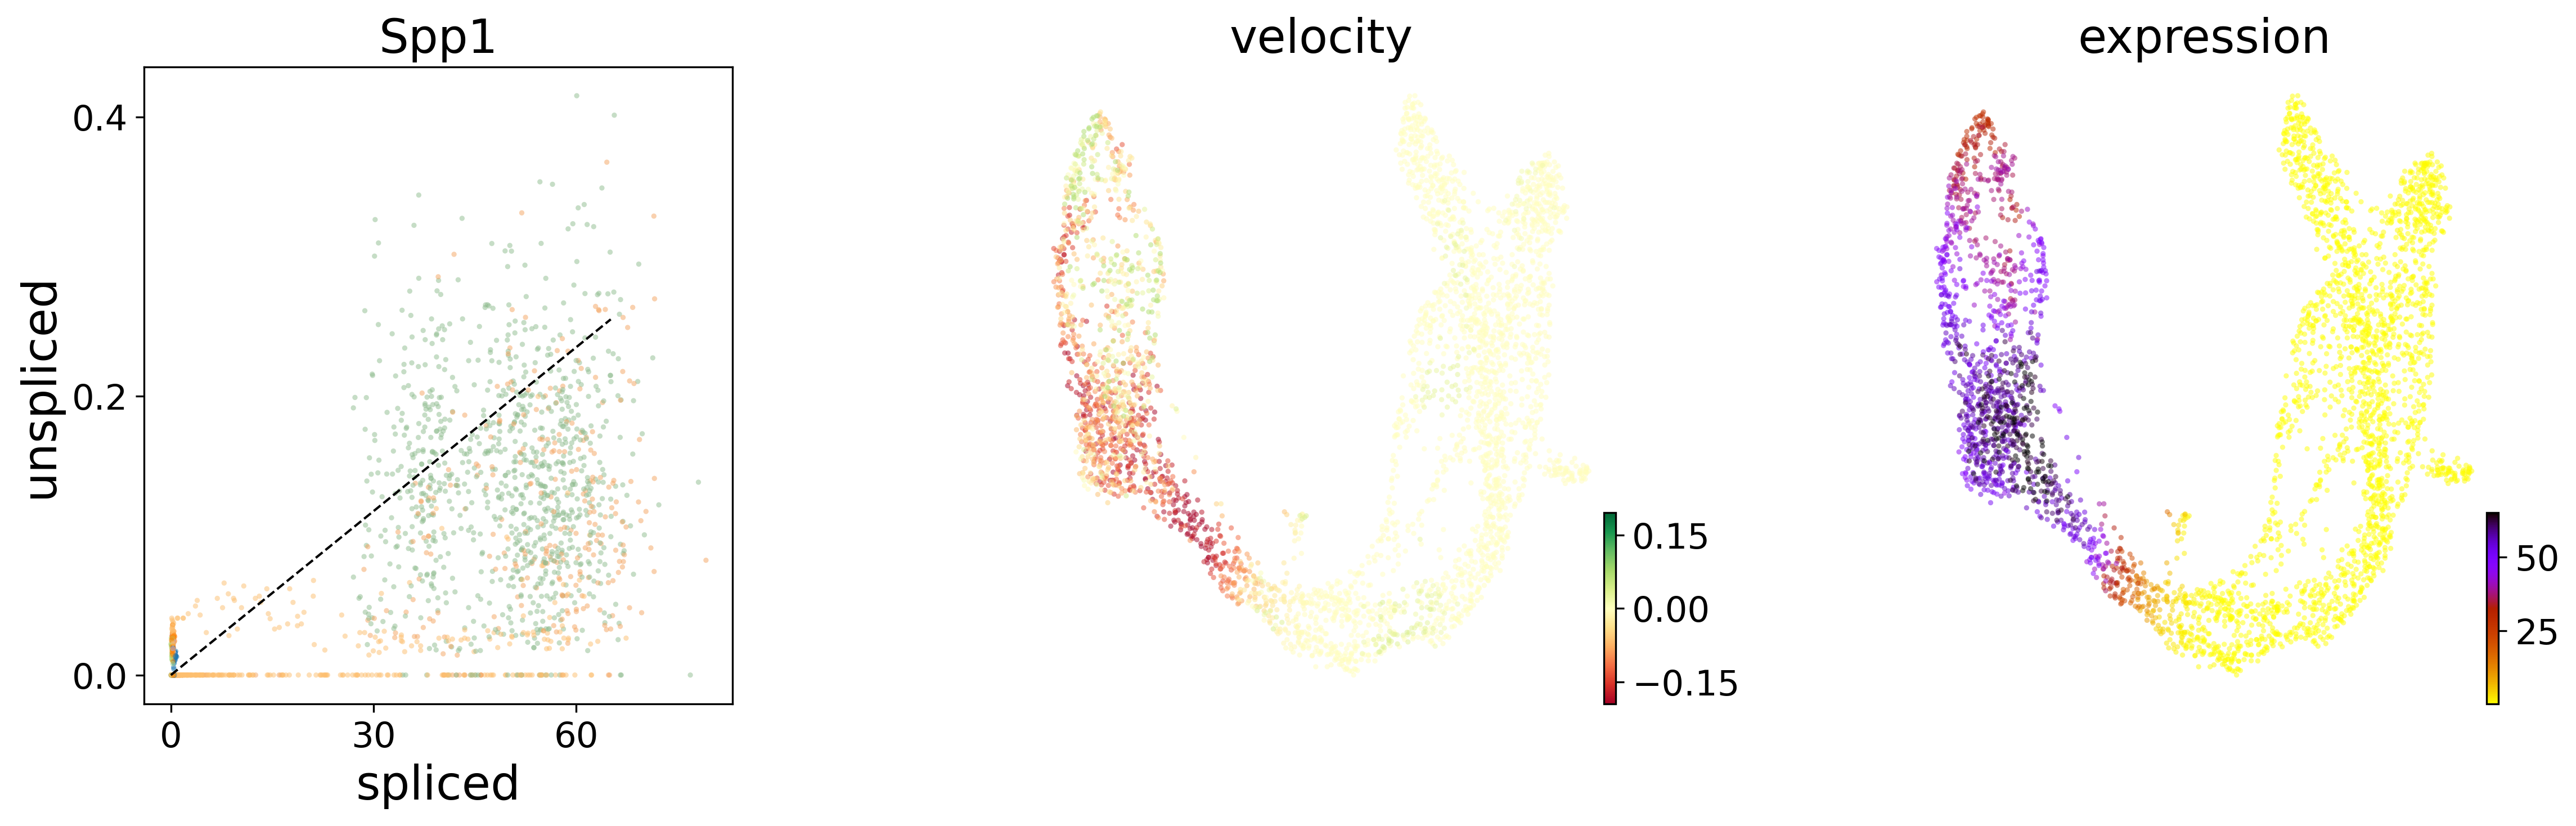

In [141]:
rcParams['figure.figsize'] = 12, 10

scv.pl.velocity(adata, 
                ['Spp1'], 
                size=20, 
                fontsize=20,
                dpi=300,
                ncols=1)

In [146]:
scv.tl.velocity_graph(adata, 
#                       gene_subset=df['Beta'][:3]
                      gene_subset=list(adata.uns['rank_genes_groups']['names']['Delta'])[:5]
                     )

computing velocity graph
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


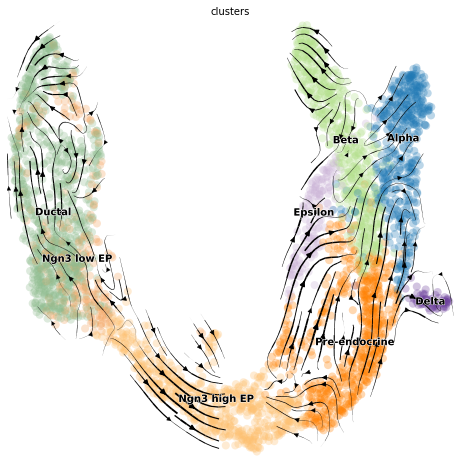

In [147]:
rcParams['figure.figsize'] = 8, 8

scv.pl.velocity_embedding_stream(adata, basis='umap')

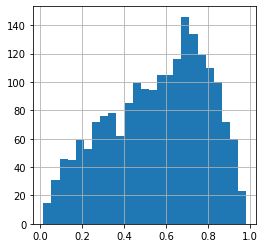

In [148]:
rcParams['figure.figsize'] = 4, 4
import pandas as pd
pd.DataFrame(adata.layers['velocity']>=0).mean(0).hist(bins=25)

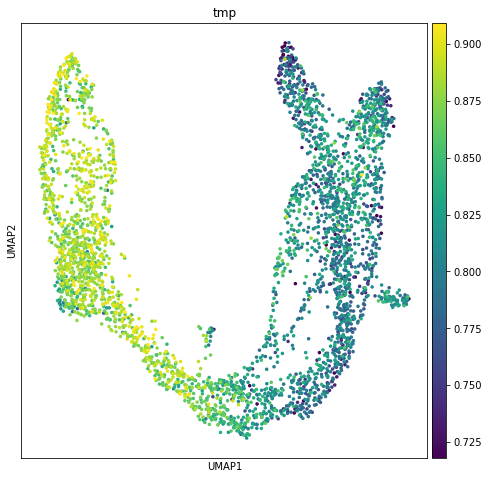

In [149]:
rcParams['figure.figsize'] = 8, 8

# single-cell ratio of spliced to unspliced
adata.obs['tmp'] = adata.obs["initial_size_spliced"]/(adata.obs["initial_size_spliced"]+adata.obs["initial_size_unspliced"])
sc.pl.umap(adata, color="tmp", vmin='p1', vmax='p99', size=50)